|Name|ANR|
|----|---|
|*Guilherme Costa*|**606411**|

# The Effect of Commodities Prices on the British Pound Exchange Rate 

## Research question

What would be the effect of commodities prices on the British Pound exchange rate?

## Motivation

For decades, economists have tried to demonstrate that the exchange rate is affected by several variables. Among these ones, some articles have focused on the effect of commodities prices on the exchange rate. [Cashin et al. (2016)](http://si2.bcentral.cl/public/pdf/documentos-trabajo/pdf/dtbc236.pdf) find evidence for a long-term relationship between real exchange rate and real commodities prices for a third of commodity-exporting countries. [Sari et al. (2010)](https://ac.els-cdn.com/S0140988309001443/1-s2.0-S0140988309001443-main.pdf?_tid=46eb5e76-02ee-11e8-8589-00000aacb35f&acdnat=1517008494_81c559bb25dc2183896151d8ce8eb8e4) demonstrate that the spot of precious metal markets varies significantly but temporarily to a shock in other metal prices and exchange rate. 
We, here, focus on the United Kingdom which is one of the world-top-exporting countries. The [distribution of UK's exports](https://atlas.media.mit.edu/en/visualize/tree_map/hs92/export/gbr/all/show/2016/) shows that commodities such as gold, crude petroleum or platinum, account for a significant part of the exports. We, therefore, investigate in the following sections whether the exported-commodities prices affect the British pound exchange rate. 

## Method

We follow the methodology of [Kolsheen et al. (2016)](https://www.bis.org/publ/work551.pdf) who study the link between commodities prices and exchange rates for developed and developing countries. As we here focus on the United Kingdom, the first step is to create an index of commodities prices based on the share of every single commodity exported on the sum of all exported commodities. 

$$I_t = \frac{(\Sigma w_i * p_{t,i})}{(\Sigma w_i * p_{0,i})}$$

where, $w_i$ stands for the weight of each commodity in all commodities exported, and $p_{t,i}$ is the price of the commodity.

Then, in a second time, we estimate the regression of the commodity-price index against the exchange rate of the British Pound vis-à-vis the United States Dollar. 

$$\Delta s_{i,t} = \alpha + \beta_{1,i} * \Delta cp_{i,t} + \varepsilon_{i,t}$$

where, $\Delta s_{i,t}$ represents the first difference of the logarithm of the British Pound exchange rate vis-à-vis the USD
on day 𝑡; $\Delta cp_{i,t}$ denotes the first difference of the logarithm of the United Kingdom's commodity price index
on the same day; and $\varepsilon_{i,t}$ stands for the error term.

According to the authors, the choice of a first-difference regression is natural as this methodology uses high-frequency variations and the variables in question typically contain stochastic trends.

## Answer

The prices of exported commodities, proxied by the commodity-price index, have a **significant and negative effect on the exchange rate** of the British Pound. If the commodity-price indice **goes up by 1%**, the exchange rate **goes down by 0.18%**. 

# Execution
## Libraries and packages




In [2]:
import xlrd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import statistics
from datetime import datetime

C:\Users\Guilherme\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data

We use data from [Datastream](https://www.thomsonone.com/DirectoryServices/2006-04-01/Web.Public/Login.aspx?brandname=datastream&version=3.7.9.18833&protocol=0). We extract an Excel file with the daily British Pound exchange rate vis-à-vis the United States Dollar and the daily price of gold, platinum and oil, for every working day for the period 01/01/2000 - 26/01/2018. 
Data on the share of selected commodities on the total of exported commodities is downloaded from the [Observatory of Economic Complexity](https://atlas.media.mit.edu/en/) which gathers international trade data.

Below we import the data from Excel to Python.

In [3]:
#Import data
workbook_base = xlrd.open_workbook("Python_assignment_base.xlsx")
worksheet = workbook_base.sheet_by_name("Sheet1")

date = list(worksheet.col_values(0))
date = date[1:]
share_gold = list(worksheet.col_values(1))
share_gold = share_gold[1:]
share_oil = list(worksheet.col_values(2))
share_oil = share_oil[1:]
share_platinum = list(worksheet.col_values(3))
share_platinum = share_platinum[1:]
price_gold = list(worksheet.col_values(4))
price_gold = price_gold[1:]
price_oil = list(worksheet.col_values(5))
price_oil = price_oil[1:]
price_platinum = list(worksheet.col_values(6))
price_platinum = price_platinum [1:]
exchange_rate = list(worksheet.col_values(7))
exchange_rate = exchange_rate [1:]

## Descriptive statistics

In [12]:
#descriptive statistics
mean_gold = round(statistics.mean(price_gold),2)
mean_oil = round(statistics.mean(price_oil),2)
mean_platinum = round(statistics.mean(price_platinum),1)
min_gold = round(min(price_gold),2)
min_oil = round(min(price_oil),2)
min_platinum = round(min(price_platinum),2)
max_gold = round(max(price_gold))
max_oil = round(max(price_oil))
max_platinum = round(max(price_platinum))
std_gold = round(statistics.stdev(price_gold),2)
std_oil = round(statistics.stdev(price_oil),2)
std_platinum = round(statistics.stdev(price_platinum),2)
count_gold = len(price_gold)
count_oil = len(price_oil)
count_platinum = len(price_platinum)
mean_exchange_rate = round(statistics.mean(exchange_rate),2)
std_exchange_rate = round(statistics.stdev(exchange_rate),2)
min_exchange_rate = round(min(exchange_rate),2)
max_exchange_rate = round(max(exchange_rate),2)
count_exchange_rate = len(exchange_rate)

table_list = [["Gold", mean_gold, std_gold, min_gold, max_gold, count_gold],
             ["Platinum", mean_platinum, std_platinum, min_platinum, max_platinum, count_platinum],
             ["Oil", mean_oil, std_oil, min_oil, max_oil, count_oil], 
             ["£/US$", mean_exchange_rate, std_exchange_rate, min_exchange_rate, max_exchange_rate, count_exchange_rate]]
print("DESCRIPTIVE STATISTICS")
print(": Product    : Mean      : Std deviation : Minimum value : Maximum value : Observations :")
for item in table_list: 
    print(":", item[0], " "*(9-len(item[0])),":", item[1], " "*(8-len(str(item[1]))),":", item[2], " "*(12-len(str(item[2]))),
          ":", item[3], " "*(12-len(str(item[3]))),":", item[4], " "*(12-len(str(item[4]))),":", item[5], " "*(11-len(str(item[5]))),":")

DESCRIPTIVE STATISTICS
: Product    : Mean      : Std deviation : Minimum value : Maximum value : Observations :
: Gold       : 892.7     : 468.02        : 256.0         : 1898          : 4715         :
: Platinum   : 1111.0    : 405.72        : 414.0         : 2273          : 4715         :
: Oil        : 61.9      : 27.49         : 17.48         : 146           : 4715         :
: £/US$      : 0.63      : 0.07          : 0.47          : 0.83          : 4715         :


## Commodity-price index

The first step of our analysis is to produce a commodity-price index for each commodity over the period 01/01/2000 - 26/01/2018. Then, from the single indexes, we create a global index of commodity-prices. Besides, we introduce an exchange rate indice. 

In [6]:
#Commodity-price index
index_gold = []
for i in range(0, len(share_gold)):
     index_gold.append(share_gold[i]*price_gold[i]) 

index_oil = []
for i in range(0, len(share_oil)):
     index_oil.append(share_oil[i]*price_oil[i])
        
index_platinum = []
for i in range(0, len(share_platinum)):
     index_platinum.append(share_platinum[i]*price_platinum[i]) 
        
final_index = []
for i in range(0, len(index_gold)):
     final_index.append(index_gold[i]+index_oil[i]+index_platinum[i])
        
index = []
for i in range(0, len(final_index)):
     index.append(final_index[i]/final_index[0]*100)         

#Exchange rate index

EX_index = []
for i in range(0, len(exchange_rate)):
     EX_index.append(exchange_rate[i]/exchange_rate[0]*100)
        

date1 = list(map(int, date))
date2 = []
for i in range(0, len(date1)):
    date2.append(xlrd.xldate.xldate_as_datetime(date1[i], 0))

date = date2

In the following graph, we plot the commodity-price index for each commodity. We observe that they approximately exhibit the same trend.

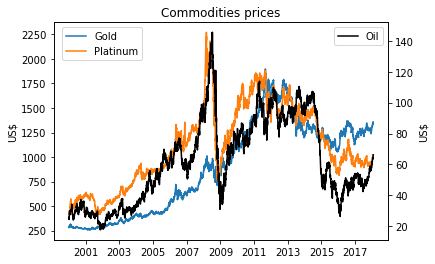

In [7]:
plt.plot(date, price_gold, date, price_platinum)
plt.title('Commodities prices')
plt.legend(["Gold", "Platinum"], bbox_to_anchor=(0.28, 1))
plt.ylabel("US$")
y2= plt.twinx()
y2.plot(date, price_oil, color ="black")
plt.legend(["Oil"])
plt.ylabel("US$")
plt.show()

Hereunder are the UK's commodity-price and exchange rate indices.

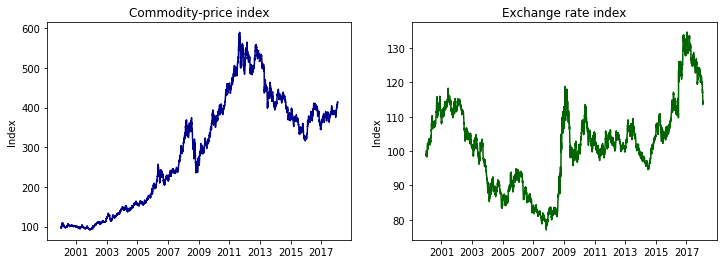

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(date, index, color = "darkblue")
plt.title('Commodity-price index')
plt.ylabel("Index")
plt.subplot(122)
plt.plot(date, EX_index, color = "darkgreen")
plt.title('Exchange rate index')
plt.ylabel("Index")
plt.show()

From the graphs above it is possible to notice that both series (commodity-price and exchange rate indexes) contain high-frequency variations and it is likely that both follow a stochastic trend at some points. To overcome any possible problem that may appear because of those this two characteristics we use the first difference of the series.

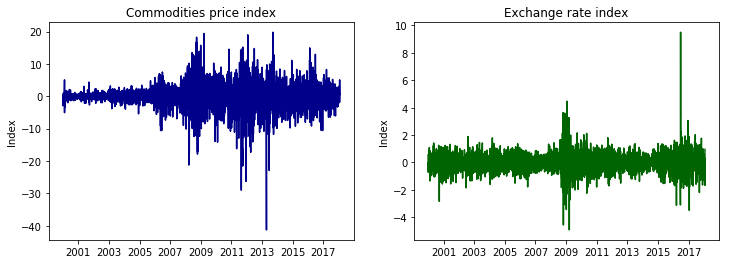

In [9]:
#first difference of the variables

d_index = []
for i in range(0, len(index)):
     d_index.append(index[i]-index[i-1]) 
d_index[0] = 0       
        
d_ex_index = []
for i in range(0, len(index)):
     d_ex_index.append(EX_index[i]-EX_index[i-1]) 
d_ex_index[0] = 0

#graph of the first difference of the variables
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(date, d_index, color = "darkblue")
plt.title('Commodities price index')
plt.ylabel("Index")
plt.subplot(122)
plt.plot(date, d_ex_index, color = "darkgreen")
plt.title('Exchange rate index')
plt.ylabel("Index")
plt.show()

## Regression

The second step of our analysis is to regress the first difference of the logarithm of the United Kingdom commodity-price index against the first difference of the logarithm of the British Pound exchange rate vis-à-vis the USD.

In [10]:
#regression
#commodity input
l_index = []
for i in range(0, len(index)):
     l_index.append(math.log(index[i])) 
        
d_index = []
for i in range(0, len(l_index)):
     d_index.append(l_index[i]-l_index[i-1]) 
d_index[0] = 0 

#exchange rate input
l_ex_index = []
for i in range(0, len(EX_index)):
     l_ex_index.append(math.log(EX_index[i])) 
          
d_ex_index = []
for i in range(0, len(index)):
     d_ex_index.append(l_ex_index[i]-l_ex_index[i-1]) 
d_ex_index[0] = 0


d_index = sm.add_constant(d_index)
results = sm.OLS(d_ex_index, d_index).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     472.1
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          7.63e-100
Time:                        18:41:21   Log-Likelihood:                 17700.
No. Observations:                4715   AIC:                        -3.540e+04
Df Residuals:                    4713   BIC:                        -3.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.168e-05   8.26e-05      0.989      0.3

## Results

The results displayed in the regression output table indicate that the effect of commodities prices on exchange rate is negative and statistically signifant at the 1% confidence level (p-value < 0.01). Hence, if the commodity-price index rises by 1%, the exchange rate of the British Pound against the United States Dollar drops by 0.18%.

## Conclusion

Following the methodology of Kolsheen et al.(2016), we find evidence for a significant and negative effect of commodities prices on the exchange rate in the United Kingdom. After demonstrating that commodities prices affect the exchange rate, it would be interesting to investigate, using the same methodology, whether exchange rates react differently  to a change in the price of exported commodities in developing and developed countries. 